In [1]:
import pandas as pd
path = 'https://github.com/alura-cursos/imersao-dados-2-2020/blob/master/MICRODADOS_ENEM_2019_SAMPLE_43278.csv?raw=true'
dados = pd.read_csv(path)

In [2]:
provas = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_REDACAO', 'NU_NOTA_MT']
dados['NU_NOTA_TOTAL'] = dados[provas].sum(axis=1)
provas.append('NU_NOTA_TOTAL')

In [4]:
dados_sem_nota_zero = dados[dados['NU_NOTA_TOTAL'] != 0]

In [5]:
dados_sem_nota_zero = dados_sem_nota_zero[provas].dropna()

In [6]:
provas_entrada = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_REDACAO']
prova_saida = 'NU_NOTA_MT'

x = dados_sem_nota_zero[provas_entrada]
y = dados_sem_nota_zero[prova_saida]

In [7]:
from sklearn.model_selection import train_test_split

SEED = 4321
x_treino, x_teste, y_treino, y_teste = train_test_split(x,y, test_size=0.15, random_state=SEED)

In [8]:
from sklearn.svm import LinearSVR

modelo = LinearSVR(random_state=SEED)
modelo.fit(x_treino,y_treino)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
          random_state=4321, tol=0.0001, verbose=0)

In [9]:
predicoes_matematica = modelo.predict(x_teste)

In [10]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

def scores_table(y_true, predictions):
  mse = mean_squared_error(y_true, predictions)
  mae = mean_absolute_error(y_true, predictions)
  rmse = mse**(1/2)
  scores = pd.Series(data={'MSE':mse, 'RMSE': rmse, 'MAE':mae})
  return scores

In [11]:
print(scores_table(y_teste, predicoes_matematica))

MSE     6121.015298
RMSE      78.236918
MAE       63.187341
dtype: float64


In [16]:
from sklearn.tree import DecisionTreeRegressor

modelo_arvore = DecisionTreeRegressor(max_depth=3)
modelo_arvore.fit(x_treino, y_treino)
predicoes_arvore = modelo_arvore.predict(x_teste)
print(scores_table(y_teste, predicoes_arvore))

MSE     6024.633603
RMSE      77.618513
MAE       62.258722
dtype: float64


In [41]:
def calcula_mse(resultados):
  media = (resultados['test_score']*-1).mean()
  desvio_padrao = (resultados['test_score']*-1).std()
  lim_inferior = media - 2*desvio_padrao
  lim_superior = media + 2*desvio_padrao
  print(f'Intervalo de confiança {lim_inferior} - {lim_superior}.')

In [48]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold

partes = KFold(n_splits=10, shuffle=True)
modelo_Arvore = DecisionTreeRegressor(max_depth=3)
resultados = cross_validate(modelo_arvore, x, y, cv=partes, scoring='neg_mean_squared_error')
calcula_mse(resultados)

Intervalo de confiança 5895.326807430014 - 6207.63556448364.


In [53]:
from sklearn.model_selection import cross_validate
import numpy as np

SEED = 1234
np.random.seed(SEED)

partes = KFold(n_splits=10, shuffle=True)
modelo_arvore = DecisionTreeRegressor(max_depth=3)
resultados = cross_validate(modelo_arvore, x, y, cv=partes, scoring='neg_mean_squared_error')
calcula_mse(resultados)

Intervalo de confiança 5850.574136139306 - 6281.395388710697.


In [119]:
def regressor_arvore(nivel):
  SEED = 1234
  np.random.seed(SEED)
  partes = KFold(n_splits=10, shuffle=True)
  modelo_arvore = DecisionTreeRegressor(max_depth=nivel)
  resultados = cross_validate(modelo_arvore, x, y, cv=partes, scoring='neg_mean_squared_error', return_train_score=True)
  return ((resultados["train_score"]*-1).mean(),(resultados["test_score"]*-1).mean())

### Desafio 01: Pesquisar sobre intervalo de confiança.

### Desafio 02: Testar com outros parâmetros da árvore de decisão.

### Desafio 03: Procurar outras formas de fazer o ajuste de parâmetros no Sklearn.

### Desafio 04: Pesquisar o que é problema de underfiting.

### Desafio 05: Plotar gráfico com test_score e train_score.

In [120]:
qnt_nivel = []
mse_train = []
mse_test = []

for i in range(1,30):
  qnt_nivel.append(i)
  mse_train.append(regressor_arvore(i)[0])
  mse_test.append(regressor_arvore(i)[1])

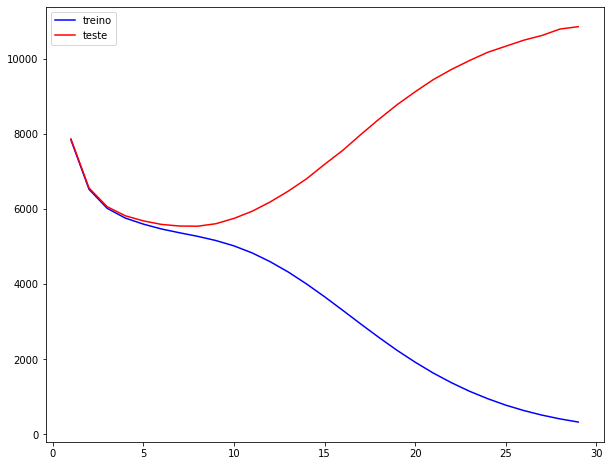

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
plt.plot(qnt_nivel, mse_train, color='b', label='treino')
plt.plot(qnt_nivel, mse_test, color='r', label='teste')
plt.legend()
plt.show()